In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR, SVC

In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")


In [ ]:
df_merge= pd.read_csv('../../Data/날씨+일별주차이용.csv')

In [ ]:
pd.read_csv('../../Data/한강2403-2409.csv')
df = pd.read_csv('../../Data/서울시 한강공원 월별 이용객 현황.csv',encoding='euc-kr')


In [ ]:

print(df.columns)
df = df.loc[:,['공원 코드','공원명','일반이용자(아침)','일반이용자(낮)', '일반이용자(저녁)','현황 일시']]

In [ ]:
df['현황 일시']= pd.to_datetime(df['현황 일시'])

In [ ]:
df_merge

In [ ]:
# PLT-001: 강서   
# PLT-002: 난지   
# PLT-003: 망원   
# PLT-004: 이촌   
# PLT-005: 뚝섬       
# PLT-006: 광나루     
# PLT-007: 양화   
# PLT-008: 여의도     
# PLT-009: 반포   
# PLT-0010: 잠원  
# PLT-0011: 잠실
                             
# Hzone011: 강서  
# Hzone009: 난지  
# Hzone010: 망원  
# Hzone006: 이촌  
# Hzone003: 뚝섬  
# Hzone001 광나루     
# Hzone008: 양화  
# Hzone007: 여의도    
# Hzone005: 반포  
# Hzone004: 잠원  
# Hzone002: 잠실  

In [ ]:
# 주차장일별['code'] 
codelist = []
for code in df['공원 코드']:
    codelist.append(code.replace('Hzone',""))

In [ ]:
df['code'] = codelist

In [ ]:
df['code']= pd.to_numeric(df['code'])

In [ ]:
# df.iloc[:,]
df_merge['날짜']= pd.to_datetime(df_merge['날짜'])

In [ ]:
df

In [ ]:
df['일반이용자(아침)'].replace(0,np.nan, inplace=True)
df['일반이용자(저녁)'].replace(0,np.nan,inplace=True)
df['일반이용자(낮)'].replace(0,np.nan,inplace=True)


In [ ]:
df.info()

In [ ]:
df.rename(columns={'현황 일시' : '날짜'},inplace=True)

In [ ]:
df['년도'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month

In [ ]:
df

In [ ]:
nanmean= pd.DataFrame({'아침 평균':df.groupby(['code','월'])['일반이용자(아침)'].mean(),
'낮 평균':df.groupby(['code','월'])['일반이용자(낮)'].mean(),
'저녁 평균':df.groupby(['code','월'])['일반이용자(저녁)'].mean()},
)

In [ ]:
nanmean.reset_index(inplace=True)

In [ ]:
nanmean['합계'] = nanmean['아침 평균'] + nanmean['낮 평균'] + nanmean['저녁 평균']

In [ ]:
nanmean['아침 비율'] = nanmean['아침 평균']/nanmean['합계']
nanmean['저녁 비율'] = nanmean['저녁 평균']/nanmean['합계']
nanmean['낮 비율'] = nanmean['낮 평균']/nanmean['합계']

In [ ]:
nanmean.drop('합계', axis=1, inplace= True)

In [ ]:
nanmean[nanmean['code'] ==5]

In [ ]:
df = pd.merge(df,nanmean, on=['code', '월'])


In [ ]:
df['월'].unique()

In [ ]:
df['일반이용자(아침)'].fillna(df['아침 평균'], inplace=True)
df['일반이용자(낮)'].fillna(df['낮 평균'], inplace=True)
df['일반이용자(저녁)'].fillna(df['저녁 평균'], inplace=True)


In [ ]:
df

In [ ]:
df

In [ ]:
df.drop(columns=['날짜','공원명','공원 코드','아침 평균','낮 평균','저녁 평균'],axis=1,inplace=True)

--------

In [ ]:
df_merge3= pd.merge(df_merge, df, how='left', left_on=['code','월','년도'], right_on=['code','월','년도'])

In [ ]:
df_merge3['휴일여부']= df_merge3['휴일여부'].map({'주말' : 1, '평일' : 0, '휴일' : 1})

In [ ]:
df_merge3.drop(['최저기온 시각(hhmi)','최고기온 시각(hhmi)','평균 이슬점온도(°C)','평균 상대습도(%)'], axis=1, inplace= True)

In [ ]:
result  = []
for i in df_merge3['일강수량(mm)']:
    if i == 0 :
        result.append(0)
    else:
        result.append(1)

In [ ]:
df_merge3['비'] = result

In [ ]:
df_merge3

In [ ]:
code_month_mean=pd.DataFrame({'지점월별아침평균':df_merge3.groupby(['code','월','휴일여부'])['일반이용자(아침)'].mean(),'지점월별낮평균':df_merge3.groupby(['code','월','휴일여부'])['일반이용자(낮)'].mean(),'지점월별저녁평균':df_merge3.groupby(['code','월','휴일여부'])['일반이용자(저녁)'].mean()})
code_month_mean.reset_index(inplace=True)

In [ ]:
code_month_mean

In [ ]:
df_merge3=pd.merge(df_merge3,code_month_mean, on=['code','월', '휴일여부'])

In [ ]:
df_merge3['아침 비율'].fillna(df_merge3['지점월별아침평균']/(df_merge3.iloc[:,-3:].sum(axis=1)), inplace=True)
df_merge3['낮 비율'].fillna(df_merge3['지점월별낮평균']/(df_merge3.iloc[:,-3:].sum(axis=1)), inplace=True)
df_merge3['저녁 비율'].fillna(df_merge3['지점월별저녁평균']/(df_merge3.iloc[:,-3:].sum(axis=1)), inplace=True)

In [ ]:
df_merge3['일반이용자(아침)'].fillna(df_merge3['지점월별아침평균'],inplace=True)
df_merge3['일반이용자(낮)'].fillna(df_merge3['지점월별낮평균'],inplace=True)
df_merge3['일반이용자(저녁)'].fillna(df_merge3['지점월별저녁평균'],inplace=True)

------------
-------------

In [ ]:
# 파일 저장
# df_merge3.to_csv('../../Data/version1.csv',index=False)

code = 지구별에서 숫자값만 추출
지구별
PLT-001: 강서   
PLT-002: 난지   
PLT-003: 망원   
PLT-004: 이촌   
PLT-005: 뚝섬       
PLT-006: 광나루     
PLT-007: 양화   
PLT-008: 여의도     
PLT-009: 반포   
PLT-0010: 잠원  
PLT-0011: 잠실  

In [3]:
df = pd.read_csv('../../Data/version1.csv')
df.head()

,주차장명,주차대수,이용시간,code,월,일,휴일여부,평균기온(°C),일반이용자(아침),일반이용자(낮),일반이용자(저녁),비
0,뚝섬1주차장,273,1.397497,5,11,10,1,14.4,5489.393939,39916.454545,56486.666667,0
1,잠실1주차장,1059,1.044397,11,11,10,1,14.4,6577.571429,30023.551020,24601.612245,0
2,강서1주차장,329,1.361449,1,11,10,1,14.4,10556.060606,46010.606061,29326.363636,0
3,여의도5주차장,229,1.638210,8,11,10,1,14.4,4180.727273,58907.515152,57783.333333,0
4,여의도2주차장,1934,1.293821,8,11,10,1,14.4,4180.727273,58907.515152,57783.333333,0


In [4]:
df

,주차장명,주차대수,이용시간,code,월,일,휴일여부,평균기온(°C),일반이용자(아침),일반이용자(낮),일반이용자(저녁),비
0,뚝섬1주차장,273,1.397497,5,11,10,1,14.4,5489.393939,39916.454545,56486.666667,0
1,잠실1주차장,1059,1.044397,11,11,10,1,14.4,6577.571429,30023.551020,24601.612245,0
2,강서1주차장,329,1.361449,1,11,10,1,14.4,10556.060606,46010.606061,29326.363636,0
3,여의도5주차장,229,1.638210,8,11,10,1,14.4,4180.727273,58907.515152,57783.333333,0
4,여의도2주차장,1934,1.293821,8,11,10,1,14.4,4180.727273,58907.515152,57783.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45303,여의도1주차장,873,4.228408,8,1,16,0,-1.7,2660.000000,45428.000000,17440.000000,0
45304,강서1주차장,28,0.206548,1,1,16,0,-1.7,11110.000000,47790.000000,37360.000000,0
45305,여의도1주차장,114,0.887865,8,1,15,0,-2.7,2660.000000,45428.000000,17440.000000,0
45306,강서1주차장,12,0.094444,1,1,15,0,-2.7,11110.000000,47790.000000,37360.000000,0


In [5]:
df.drop('일',axis=1, inplace= True)

In [6]:
df.head()

,주차장명,주차대수,이용시간,code,월,휴일여부,평균기온(°C),일반이용자(아침),일반이용자(낮),일반이용자(저녁),비
0,뚝섬1주차장,273,1.397497,5,11,1,14.4,5489.393939,39916.454545,56486.666667,0
1,잠실1주차장,1059,1.044397,11,11,1,14.4,6577.571429,30023.551020,24601.612245,0
2,강서1주차장,329,1.361449,1,11,1,14.4,10556.060606,46010.606061,29326.363636,0
3,여의도5주차장,229,1.638210,8,11,1,14.4,4180.727273,58907.515152,57783.333333,0
4,여의도2주차장,1934,1.293821,8,11,1,14.4,4180.727273,58907.515152,57783.333333,0


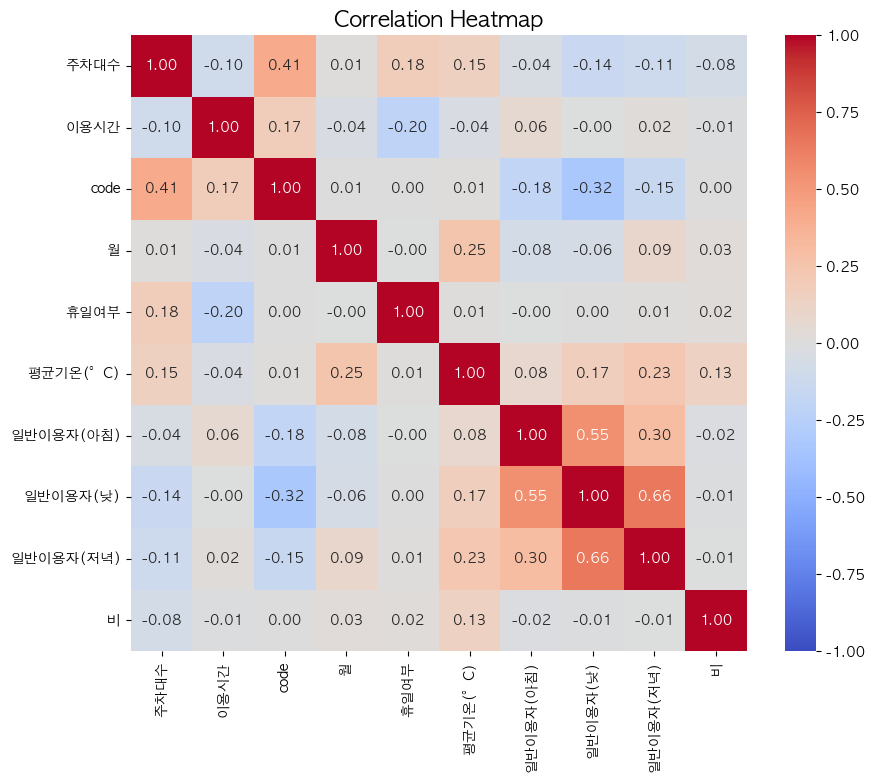

In [7]:

# 상관계수 계산
correlation_matrix = df.iloc[:,1:].corr()

# 그림 크기 설정
plt.figure(figsize=(10, 8))

# heatmap 생성
sns.heatmap(correlation_matrix, 
            annot=True,  # 각 셀에 숫자 표시
            cmap='coolwarm',  # 색상 맵 설정
            vmin=-1, vmax=1,  # 색상 범위 설정
            center=0,  # 0을 중심으로 색상 대칭
            square=True,  # 정사각형 셀
            fmt='.2f')  # 소수점 둘째 자리까지 표시

# 제목 설정
plt.title('Correlation Heatmap', fontsize=16)

# 그래프 표시
plt.show()


In [8]:
feature =df.iloc[:,[2,3,4,5,6,7,8,9,10]]
target = df['주차대수']

In [9]:
x_train, x_test, y_trian, y_test = train_test_split(
                                    feature,
                                    target,
                                    test_size=0.3,
                                    stratify=df['주차장명']
)

In [10]:
ss = StandardScaler()
train_scaler=ss.fit_transform(x_train)

In [11]:
test_scaler= ss.transform(x_test)

In [12]:
result =[]
scores = []
scores= cross_validate(
                    RandomForestRegressor(),
                    train_scaler,
                    y_trian,
                    cv=5,
                    return_train_score=True
    )
print(f"train_score : {np.mean(scores['train_score'])} test_score : {np.mean(scores['test_score'])}")
## ..


train_score : 0.9581730402038353 test_score : 0.6993371819964912


In [15]:
y_trian

20132    2071
43035     723
27476     193
8498      148
3178      660
         ... 
29410     846
27378    2747
22005     379
36192     803
1148      309
Name: 주차대수, Length: 31715, dtype: int64

In [14]:
x_train

,이용시간,code,월,휴일여부,평균기온(°C),일반이용자(아침),일반이용자(낮),일반이용자(저녁),비
20132,0.460985,11,11,0,15.6,8085.000000,15020.000000,10806.000000,0
43035,0.528308,4,4,0,7.9,6470.000000,34620.000000,32380.000000,0
27476,1.489983,5,1,0,-5.8,3350.000000,65650.000000,48205.000000,1
8498,1.221734,5,1,0,1.7,12700.000000,38150.000000,22055.000000,0
3178,1.476414,5,7,0,27.0,7092.919540,53952.103448,107148.344828,1
...,...,...,...,...,...,...,...,...,...
29410,1.207250,6,10,1,14.1,3535.000000,41150.000000,22930.000000,1
27378,0.776544,11,1,0,-5.0,1784.000000,16194.000000,17062.000000,0
22005,4.368030,8,8,0,23.8,4100.000000,87050.000000,67849.000000,0
36192,4.061934,8,2,0,5.0,12410.600000,49652.000000,61555.000000,1


In [22]:
# df['아침이용비율'] =
df['아침이용비율']= df['일반이용자(아침)'] / (df['일반이용자(아침)']+df['일반이용자(낮)']+df['일반이용자(저녁)'])
df['낮이용비율']= df['일반이용자(낮)'] / (df['일반이용자(아침)']+df['일반이용자(낮)']+df['일반이용자(저녁)'])
df['저녁이용비율']= df['일반이용자(저녁)'] / (df['일반이용자(아침)']+df['일반이용자(낮)']+df['일반이용자(저녁)'])
# df

In [26]:
df['아침주차']= df['주차대수'] * df['아침이용비율']
df['낮주차']= df['주차대수'] * df['낮이용비율']
df['저녁주차']= df['주차대수'] * df['저녁이용비율']
df.head()

,주차장명,주차대수,이용시간,code,월,휴일여부,평균기온(°C),일반이용자(아침),일반이용자(낮),일반이용자(저녁),비,아침이용비율,낮이용비율,저녁이용비율,아침주차,낮주차,저녁주차
0,뚝섬1주차장,273,1.397497,5,11,1,14.4,5489.393939,39916.454545,56486.666667,0,0.053874,0.391751,0.554375,14.707700,106.947915,151.344385
1,잠실1주차장,1059,1.044397,11,11,1,14.4,6577.571429,30023.551020,24601.612245,0,0.107472,0.490559,0.401969,113.812694,519.501958,425.685347
2,강서1주차장,329,1.361449,1,11,1,14.4,10556.060606,46010.606061,29326.363636,0,0.122898,0.535673,0.341429,40.433361,176.236527,112.330111
3,여의도5주차장,229,1.638210,8,11,1,14.4,4180.727273,58907.515152,57783.333333,0,0.034588,0.487356,0.478056,7.920692,111.604576,109.474732
4,여의도2주차장,1934,1.293821,8,11,1,14.4,4180.727273,58907.515152,57783.333333,0,0.034588,0.487356,0.478056,66.893531,942.546944,924.559525


In [ ]:
df.groupby([''])

<Axes: >

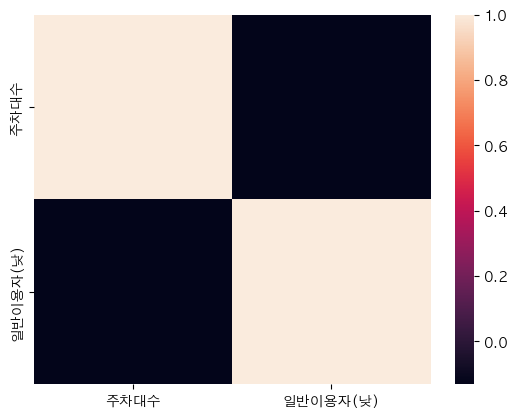

In [89]:
sns.heatmap(
    df.loc[:,['주차대수','일반이용자(낮)']].corr()
)

In [29]:
park_info=pd.read_csv('../../Data/한강공원 주차장 정보.csv',encoding= 'euc-kr')

In [33]:
park_info.지구별.unique()

array(['강서', '광나루', '난지', '뚝섬', '망원', '반포', '양화', '여의도', '이촌', '잠실', '잠원'],
      dtype=object)

In [65]:
df=pd.merge(df, park_info.loc[:,['주차장별','면수']], how='inner', left_on='주차장명', right_on='주차장별')

In [ ]:
df.drop('주차장별',axis=1, inplace= True)

In [90]:
df['아침주차비율'] = df['면수']*df['아침이용비율'] 
df['낮주차비율'] = df['면수']*df['낮이용비율']
df['저녁주차비율'] = df['면수']*df['저녁이용비율']
df.head()

,주차장명,주차대수,이용시간,code,월,휴일여부,평균기온(°C),일반이용자(아침),일반이용자(낮),일반이용자(저녁),...,아침이용비율,낮이용비율,저녁이용비율,아침주차,낮주차,저녁주차,면수,아침주차비율,낮주차비율,저녁주차비율
0,뚝섬1주차장,273,1.397497,5,11,1,14.4,5489.393939,39916.454545,56486.666667,...,0.053874,0.391751,0.554375,14.707700,106.947915,151.344385,67,3.609582,26.247291,37.143127
1,잠실1주차장,1059,1.044397,11,11,1,14.4,6577.571429,30023.551020,24601.612245,...,0.107472,0.490559,0.401969,113.812694,519.501958,425.685347,471,50.619244,231.053279,189.327477
2,강서1주차장,329,1.361449,1,11,1,14.4,10556.060606,46010.606061,29326.363636,...,0.122898,0.535673,0.341429,40.433361,176.236527,112.330111,53,6.513581,28.390687,18.095732
3,여의도5주차장,229,1.638210,8,11,1,14.4,4180.727273,58907.515152,57783.333333,...,0.034588,0.487356,0.478056,7.920692,111.604576,109.474732,217,7.505634,105.756301,103.738065
4,여의도2주차장,1934,1.293821,8,11,1,14.4,4180.727273,58907.515152,57783.333333,...,0.034588,0.487356,0.478056,66.893531,942.546944,924.559525,171,5.914578,83.337915,81.747507


In [91]:
df[df['code'] ==8]

,주차장명,주차대수,이용시간,code,월,휴일여부,평균기온(°C),일반이용자(아침),일반이용자(낮),일반이용자(저녁),...,아침이용비율,낮이용비율,저녁이용비율,아침주차,낮주차,저녁주차,면수,아침주차비율,낮주차비율,저녁주차비율
3,여의도5주차장,229,1.638210,8,11,1,14.4,4180.727273,58907.515152,57783.333333,...,0.034588,0.487356,0.478056,7.920692,111.604576,109.474732,217,7.505634,105.756301,103.738065
4,여의도2주차장,1934,1.293821,8,11,1,14.4,4180.727273,58907.515152,57783.333333,...,0.034588,0.487356,0.478056,66.893531,942.546944,924.559525,171,5.914578,83.337915,81.747507
9,여의도1주차장,3398,1.741804,8,11,1,14.4,4180.727273,58907.515152,57783.333333,...,0.034588,0.487356,0.478056,117.530620,1656.036460,1624.432919,462,15.979737,225.158577,220.861686
18,여의도4주차장,41,0.810569,8,11,1,14.4,4180.727273,58907.515152,57783.333333,...,0.034588,0.487356,0.478056,1.418115,19.981605,19.600279,141,4.876933,68.717228,67.405839
23,여의도3주차장,2326,2.283240,8,11,1,14.4,4180.727273,58907.515152,57783.333333,...,0.034588,0.487356,0.478056,80.452096,1133.590585,1111.957319,800,27.670540,389.884982,382.444478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39772,여의도1주차장,1541,1.868938,8,1,1,0.3,2660.000000,45428.000000,17440.000000,...,0.040593,0.693261,0.266146,62.554328,1068.315041,410.130631,462,18.754120,320.286534,122.959346
39776,여의도1주차장,1113,3.829695,8,1,0,-0.6,2660.000000,45428.000000,17440.000000,...,0.040593,0.693261,0.266146,45.180381,771.599377,296.220242,462,18.754120,320.286534,122.959346
39780,여의도1주차장,873,4.228408,8,1,0,-1.7,2660.000000,45428.000000,17440.000000,...,0.040593,0.693261,0.266146,35.437981,605.216762,232.345257,462,18.754120,320.286534,122.959346
39782,여의도1주차장,114,0.887865,8,1,0,-2.7,2660.000000,45428.000000,17440.000000,...,0.040593,0.693261,0.266146,4.627640,79.031742,30.340618,462,18.754120,320.286534,122.959346


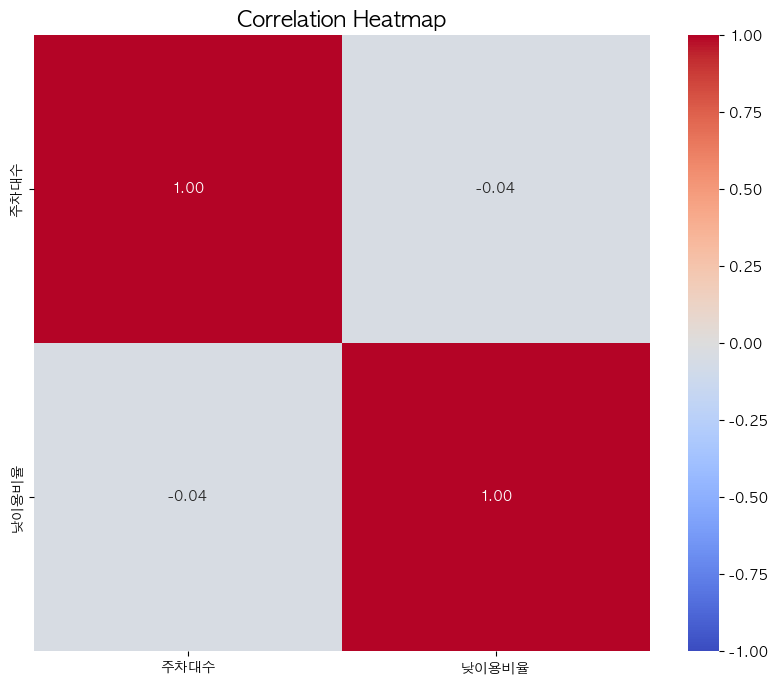

In [80]:

# 그림 크기 설정
plt.figure(figsize=(10, 8))

sns.heatmap(
            df.loc[:,['주차대수','낮이용비율']].corr(),
            annot=True,  # 각 셀에 숫자 표시
            cmap='coolwarm',  # 색상 맵 설정
            vmin=-1, vmax=1,  # 색상 범위 설정
            center=0,  # 0을 중심으로 색상 대칭
            square=True,  # 정사각형 셀
            fmt='.2f')  # 소수점 둘째 자리까지 표시

# 제목 설정
plt.title('Correlation Heatmap', fontsize=16)

# 그래프 표시
plt.show()


In [ ]:
grouped_df = df.groupby(['code', '월','휴일여부'], as_index=False)['주차대수'].sum()
grouped_df

,code,월,휴일여부,주차대수
0,1,1,0,9256
1,1,1,1,9291
2,1,2,0,10356
3,1,2,1,10663
4,1,3,0,16484
...,...,...,...,...
259,11,10,1,95461
260,11,11,0,200544
261,11,11,1,48306
262,11,12,0,129930


In [151]:
test=pd.merge(grouped_df, df.loc[:,['주차대수','code','월','주차장명','휴일여부']], how='right', left_on=['code','월','휴일여부'], right_on=['code','월','휴일여부'])

In [161]:
test

,code,월,휴일여부,주차대수_x,주차대수_y,주차장명,주차비율
0,5,11,1,83614,273,뚝섬1주차장,0.003265
1,11,11,1,48306,1059,잠실1주차장,0.021923
2,1,11,1,10128,329,강서1주차장,0.032484
3,8,11,1,181766,229,여의도5주차장,0.001260
4,8,11,1,181766,1934,여의도2주차장,0.010640
...,...,...,...,...,...,...,...
39780,8,1,0,313354,873,여의도1주차장,0.002786
39781,1,1,0,9256,28,강서1주차장,0.003025
39782,8,1,0,313354,114,여의도1주차장,0.000364
39783,1,1,0,9256,12,강서1주차장,0.001296


In [ ]:
test['주차비율'] = (test['주차대수_y']/test['주차대수_x'])

,code,월,휴일여부,주차대수_x,주차대수_y,주차장명,주차비율
0,5,11,1,83614,273,뚝섬1주차장,0.003265
1,11,11,1,48306,1059,잠실1주차장,0.021923
2,1,11,1,10128,329,강서1주차장,0.032484
3,8,11,1,181766,229,여의도5주차장,0.001260
4,8,11,1,181766,1934,여의도2주차장,0.010640
...,...,...,...,...,...,...,...
39780,8,1,0,313354,873,여의도1주차장,0.002786
39781,1,1,0,9256,28,강서1주차장,0.003025
39782,8,1,0,313354,114,여의도1주차장,0.000364
39783,1,1,0,9256,12,강서1주차장,0.001296


In [ ]:
pd.merge(df, test, how='left', left_on=['code','월','휴일여부','주차장명'])